<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/1_29_Matplotlib Plotting.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!pip install datasets

In [ ]:

import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
import matplotlib.pyplot as plt


## 🟩 Job Country Bar Chart (1.29.1)

In [ ]:
locations_count = df['job_country'].value_counts().head(5)

In [ ]:
locations_count

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694


<BarContainer object of 5 artists>

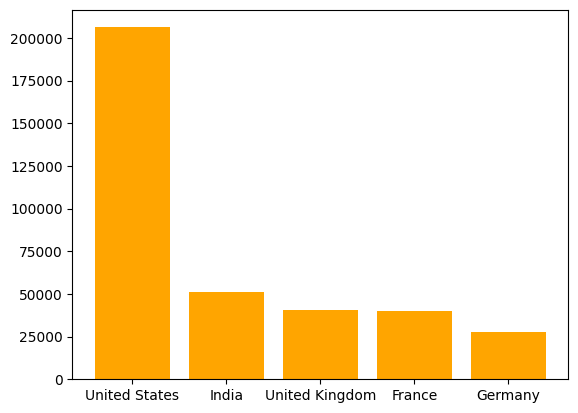

In [ ]:
plt.bar(locations_count.index, locations_count.values, color='orange')

---

## 🟨 Average Salary Horizontal Bar Chart (1.29.2)

In [ ]:
salary_per_title = df.groupby('job_title_short')['salary_year_avg'].mean()
salary_per_title = salary_per_title.sort_values(ascending=True)
salary_per_title

,salary_year_avg
job_title_short,
Business Analyst,91082.612833
Data Analyst,93841.907854
Cloud Engineer,111268.453846
Software Engineer,113393.760054
Senior Data Analyst,113911.363665
Machine Learning Engineer,126774.315972
Data Engineer,130125.604250
Data Scientist,135988.837171
Senior Data Engineer,145840.611624


<BarContainer object of 10 artists>

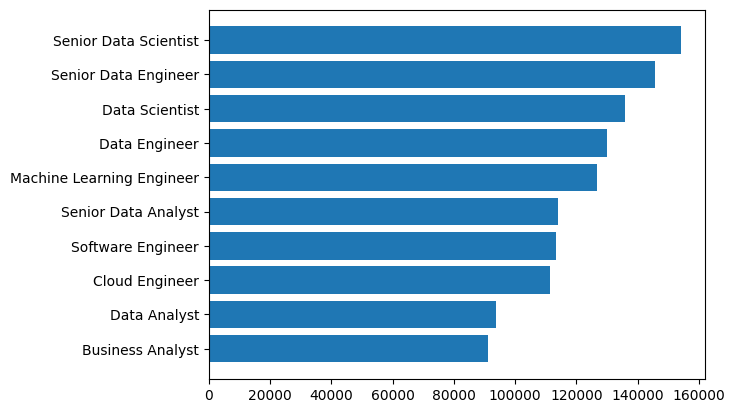

In [ ]:
plt.barh(salary_per_title.index, salary_per_title.values)

---

## 🟥 Average Salary Trend Line Plot (1.29.3)

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [ ]:
months = df.groupby('job_posted_month')['salary_year_avg'].mean().sort_index()         # sort index values with .sort_index()


In [ ]:
months

,salary_year_avg
job_posted_month,
1,123007.422072
2,122913.927237
3,122947.810047
4,121856.551050
5,123656.747729
6,124321.135360
7,123470.572994
8,125819.429100
9,125222.984594


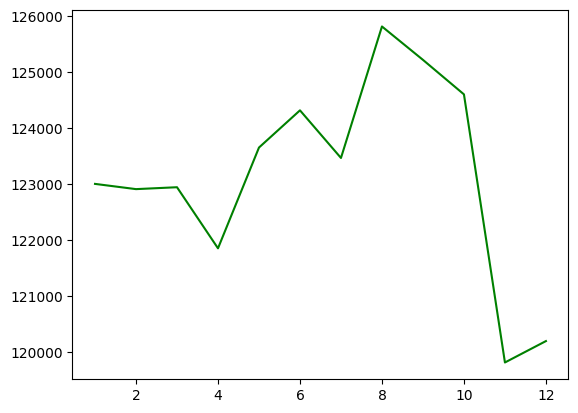

In [ ]:
plt.plot(months.index, months.values, color='green')

---